# Introduction

This notebook delves into the intricacies of hypothesis testing and statistical analysis using a real-world dataset: the Health Insurance dataset. The dataset's components, as outlined below, offer a rich source of information for in-depth exploration and insightful conclusions.

Dataset Description:
Age: An integer representing the age of the primary beneficiary (excluding those above 64
years, covered by the government).

Sex: Gender of the policy holder, categorized as male or female.

BMI: Body Mass Index (BMI) indicates relative weight status, calculated as weight (in kg) divided by height (in meters) squared. The optimal BMI range is 18.5 to 24.9.

Children: An integer indicating the count of children or dependents covered by the insurance plan.

Smoker: A binary categorization indicating whether the insured person smokes tobacco (yes or no).

Region: Geographical location of the beneficiary within the U.S., categorized into northeast, southeast, southwest, or northwest regions.

Charges: Medical costs billed to health insurance for individuals.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from scipy.stats import f_oneway
import statistics as stats2
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# import dataset
df = pd.read_csv('Medical_Insurance_Dataset.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# <p style="font-size:24px; font-family:'Candara'; font-weight: bold; line-height:1.3">Exploratory Data Analysis</p>

<p style="font-size:18px; font-family:'Calibri Light'; font-weight:bold;">Investigate Nulls and Duplicated Records: Dataset Copy</p>

In [ ]:
df_copy = df.copy()

Checking for Missing/Null Values

In [ ]:
#checking for null values
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for Duplicated Records

In [ ]:
#records with BMI
df_copy.loc[df_copy['bmi'] == 30.59]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56310
423,25,male,30.59,0,no,northeast,2727.39510
526,19,female,30.59,2,no,northwest,24059.68019
567,41,male,30.59,2,no,northwest,7256.72310
581,19,male,30.59,0,no,northwest,1639.56310
983,27,female,30.59,1,no,northeast,16796.41194
1158,20,female,30.59,0,no,northeast,2459.72010


In [ ]:
#records with charges
df_copy.loc[df_copy['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#records with bmi 30.59 and charges 1639.5631
df_copy[df_copy.duplicated(subset=['bmi', 'charges'], keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Although records 195 and 581 might appear duplicated at firrst glance, there is no concrete evidence to support the conclusion that they are indeed duplicates. Therefore, the records will remain unchanged, and the analysis will continue.

The dataset in depth:

The dataset comprises 7 features and 1338 entries, all of which are non-null.
Numerical Features:

Age

1.  BMI
2.  Children
3. Charges

Categorical Features:

1.   Sex
2.   Region
3. Smoker




In [ ]:
#dataset info
df_copy.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This initial assessment of the dataset sets the stage for conducting more comprehensive analyses aimed at extracting valuable insights from the data

In [ ]:
#spread of numerical data
dat.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


After reviewing the dataset, it seems that there are instances of duplicated records. However, upon further scrutiny, there isn't substantial evidence to support their removal. Furthermore, our assessment for missing values reveals that none are present. This initial evaluation of the dataset establishes a foundation for conducting more comprehensive analyses aimed at extracting valuable insights from the data.

In [ ]:
# Generate frequency counts for categorical variables to prepare for plotting
gender_counts = np.unique(dat['sex'], return_counts=True)
smoker_counts = np.unique(dat['smoker'], return_counts=True)
region_counts = np.unique(dat['region'], return_counts=True)

# Display the frequency counts for each categorical variable
print('Counts for gender: {}\n'.format(gender_counts))
print('Counts for smoker: {}\n'.format(smoker_counts))
print('Counts for region: {}\n'.format(region_counts))


Counts for gender: (array(['female', 'male'], dtype=object), array([662, 676]))

Counts for smoker: (array(['no', 'yes'], dtype=object), array([1064,  274]))

Counts for region: (array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), array([324, 325, 364, 325]))



Do people who smoke end up paying more for their health costs than those who don't smoke?

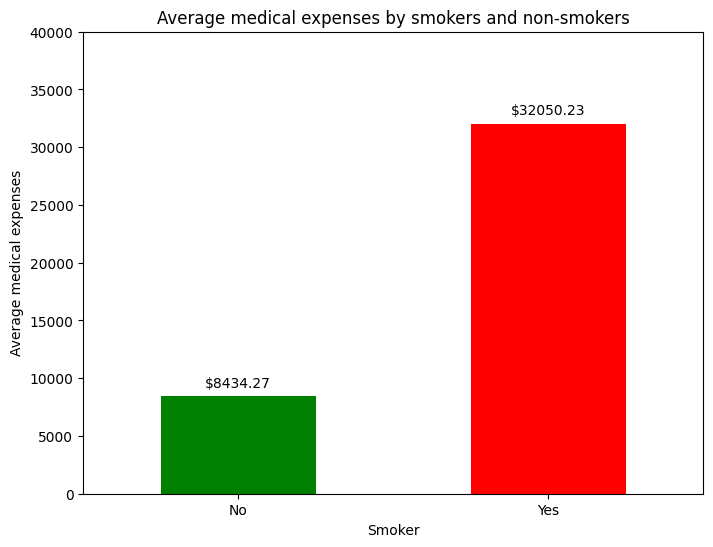

In [ ]:
average_charges_by_smoker = df.groupby('smoker')['charges'].mean()
plt.figure(figsize=(8, 6))
ax = average_charges_by_smoker.plot(kind='bar', color=['GREEN', 'RED'])
plt.title('Average medical expenses by smokers and non-smokers')
plt.xlabel('Smoker')
plt.ylabel('Average medical expenses')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylim(0, 40000)
for i, v in enumerate(average_charges_by_smoker):
    ax.text(i, v + 500, f"${v:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()


Analysis:

Based on the provided data, we can conclude that people who smoke "yes" have a significantly higher average medical expenses approximately 32,050.23 compared to those who do not smoke "no", who have a muchlower average medical expenses approximately 8,434.27. This indicates that smokers tend to pay considerably more for their healthcare costs than non- smokers. bold text

Does being male or female affect how much someone weighs overall?

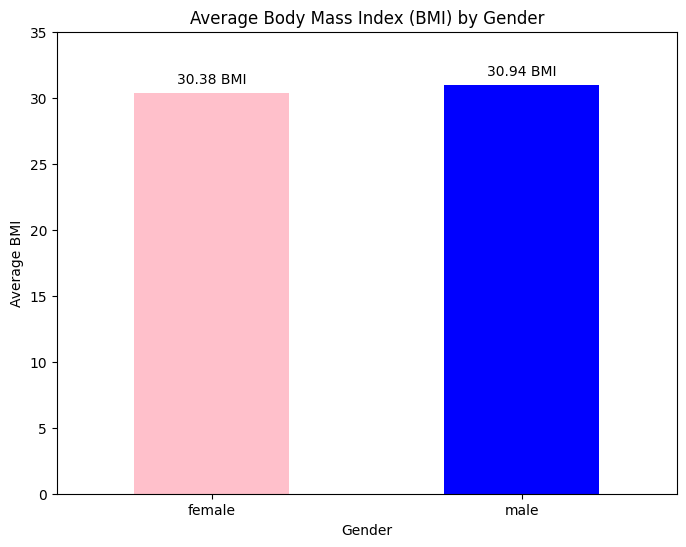

In [ ]:
average_bmi_by_sex = df.groupby('sex')['bmi'].mean()
plt.figure(figsize=(8, 6))
average_bmi_by_sex.plot(kind='bar', color=['PINK', 'BLUE'])
plt.title('Average Body Mass Index (BMI) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.xticks(rotation=0)
plt.ylim(0, 35)
for i, v in enumerate(average_bmi_by_sex):
    plt.text(i, v + 0.5, f"{v:.2f} BMI", ha='center', va='bottom', fontsize=10)
plt.show()


Analysis:

Based on the provided data, we can conclude that, on average, there does not appear to be a substantial difference in Body Mass Index (BMI) between men and women. Women have an average BMI of approximately 30.38, while men have an average BMI of around 30.94. This suggests that, in general terms, gender does not seem to significantly affect the weight or BMI of individuals in this dataset.

Do individuals with higher weight cause higher costs compared to those who weigh less?

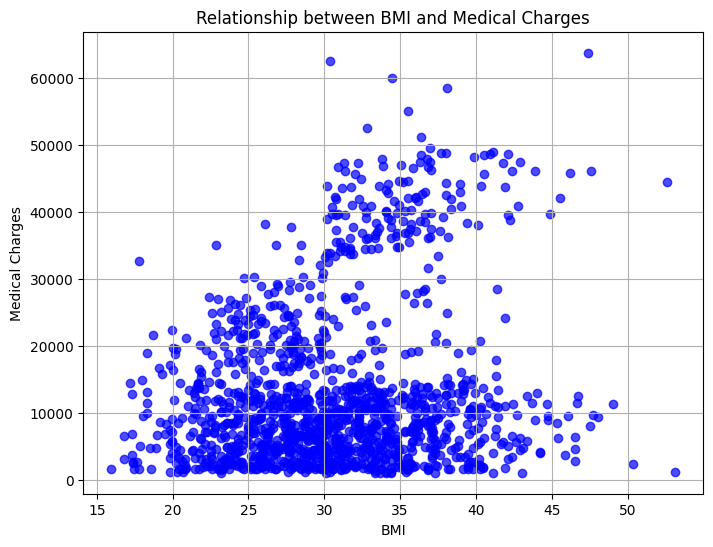

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.7, c='blue')
plt.title('Relationship between BMI and Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.grid(True)
plt.show()


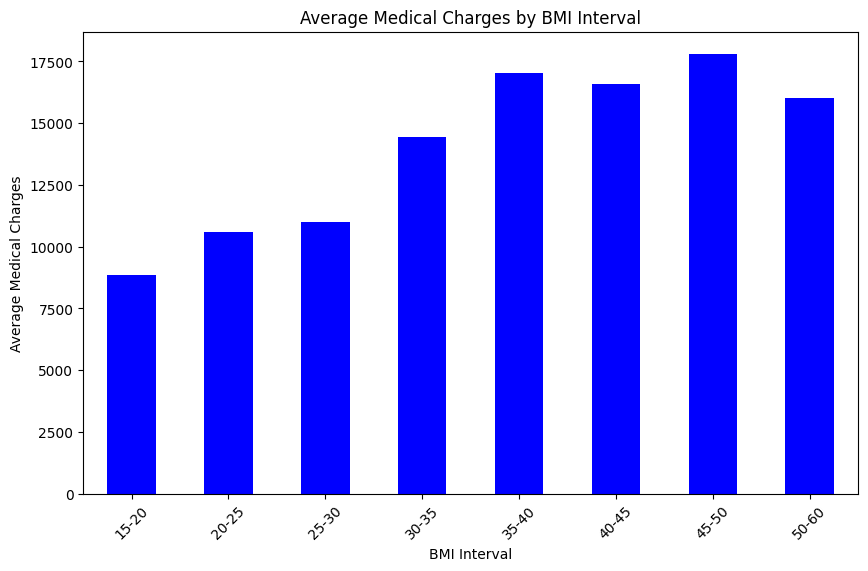

In [ ]:
bmi_bins = [15, 20, 25, 30, 35, 40, 45, 50, 60]
bmi_labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-60']
df['bmi_interval'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)
average_charges_by_bmi = df.groupby('bmi_interval')['charges'].mean()

plt.figure(figsize=(10, 6))
average_charges_by_bmi.plot(kind='bar', color='blue')
plt.title('Average Medical Charges by BMI Interval')
plt.xlabel('BMI Interval')
plt.ylabel('Average Medical Charges')
plt.xticks(rotation=45)
plt.show()


Analysis:

Based on the provided data, we can observe a clear trend that the average medical charges tend to increase as Body Mass Index (BMI) of individuals increases. The BMI intervals were divided into groups of 5 units (e.g., 15-20, 20-25, 25-30, etc.), and the average medical charges in each group were calculated.
Those with a BMI in the 45-50 range have the highest average medical charges, at approximately US 17,815.04, closely followed by those with a BMI in the 35-40 range, which have an average of about US 17,022.26. This suggests that individuals with higher BMI tend to have higher medical costs compared to those with lower BMI.
It's important to note that this is a correlational observation and doesn't necessarily imply a causal relationship. Several factors can influence medical charges, and BMI is just one of them. Other factors such as lifestyle, medical history, and health habits can also play a significant role in medical expenses.

Does how old someone is affect how much they use their health insurance?

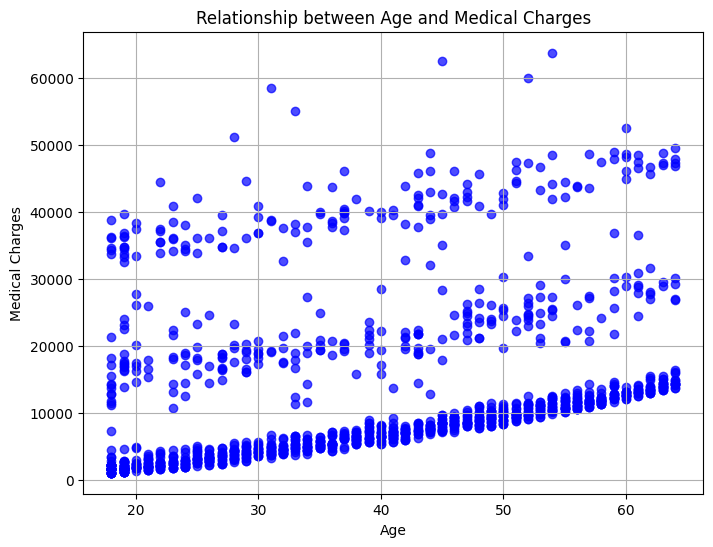

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'], alpha=0.7, c='blue')
plt.title('Relationship between Age and Medical Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.grid(True)
plt.show()


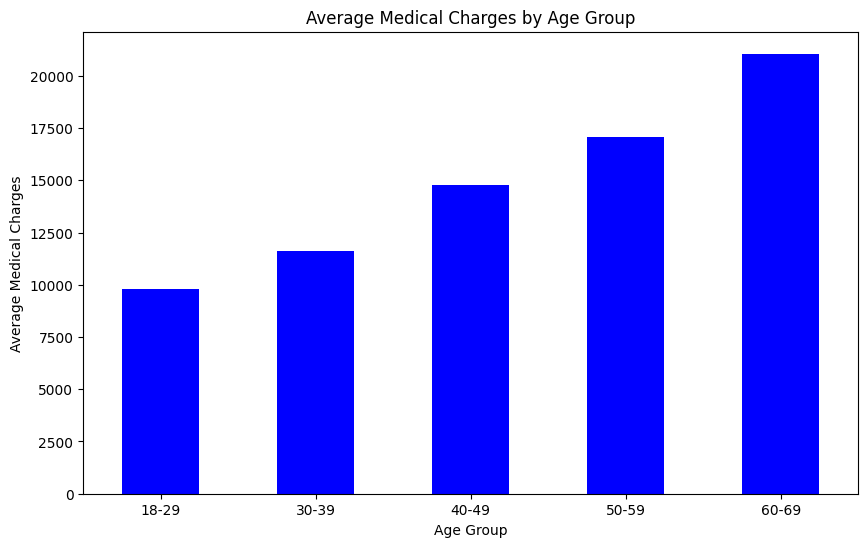

In [ ]:
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
average_charges_by_age = df.groupby('age_group')['charges'].mean()

plt.figure(figsize=(10, 6))
average_charges_by_age.plot(kind='bar', color='blue')
plt.title('Average Medical Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Medical Charges')
plt.xticks(rotation=0)
plt.show()


Analysis of Results:

Based on the provided data, we can observe a clear trend that the average medical charges tend to increase as individuals' age increases. The data is grouped into age ranges, and the average medical charges in each age group have been calculated.

Individuals in the 60-69 age group have the highest average medical charges, with an average of approximately 21,063.16. This is followed by individuals in the 50-59 age group, with an average of about 17,062.29. As the age group decreases, the average medical charges also decrease.

This suggests that age does have an impact on how much individuals use their health insurance, with older individuals generally incurring higher medical charges compared to younger individuals. However, it's important to note that this is a correlation, and various other factors may contribute to these differences in medical charges, such as pre-existing health conditions and healthcare utilization patterns.

Does having more family members to cover on insurance affect how much insurance is used?

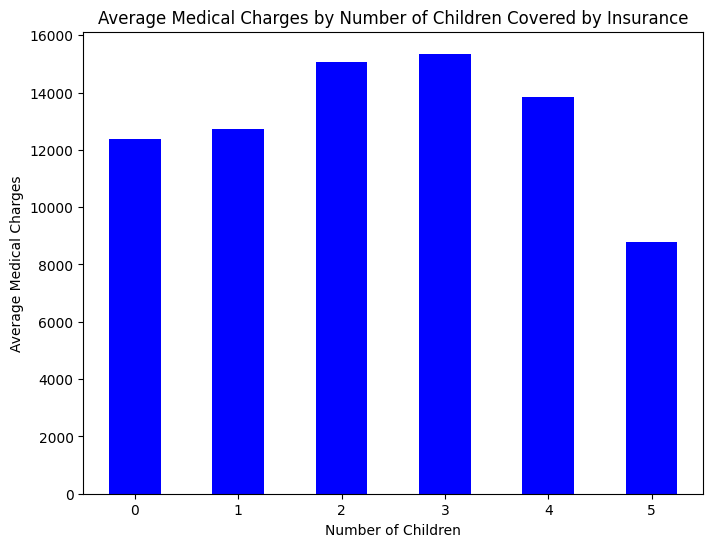

In [ ]:
average_charges_by_children = df.groupby('children')['charges'].mean()

plt.figure(figsize=(8, 6))
average_charges_by_children.plot(kind='bar', color='blue')
plt.title('Average Medical Charges by Number of Children Covered by Insurance')
plt.xlabel('Number of Children')
plt.ylabel('Average Medical Charges')
plt.xticks(rotation=0)
plt.show()


Analysis:

Based on the provided data, it appears that the average medical charges tend to vary based on the number of children covered by insurance.
Interestingly, there appears to be a decrease in average expenses when going from 3 to 5 children. However, it's important to note that this decrease doesn't necessarily follow a linear logic and may be due to data variations or specific sample factors.

This irregular variation suggests that the number of children covered by insurance is not the only factor influencing medical expenses. Other factors, such as individual health and patterns of healthcare utilization, also play a significant role in determining each person's medical expenses. Therefore, while there is a general trend of increasing expenses with an increase in the number of children, this relationship may not be direct and linear, and other individual factors may also have an influence.

Can we find out if certain patients are more likely to have health risks by looking at how often they use their insurance?

## Objective Hypothesis

# Prove (or disprove) that the medical claims made by the people who smoke is greater than those who do not?

H0:μ1<=μ2, Smokers, on average, are charged less than or equal to nonsmokers

Ha:μ1>μ2, Smokers, on average, are charged greater than nonsmokers

Standard deviation of the population is not known, so a T-stat test will be performed . The > sign in the alternate hypothesis indicates the test is right tailed, that is, all z values that would cause us to reject null hypothesis are in just one tail to the right of the sampling distribution curve.

In [ ]:
data = df.copy()
smokers = data[data['smoker'] == 'yes']
nonsmokers = data[data['smoker'] == 'no']

t_statistic, p_value = stats.ttest_ind(smokers['charges'], nonsmokers['charges'])
alpha = 0.05

if p_value < alpha:
    print("The difference in claims between smokers and nonsmokers is statistically significant.")
    print(f"p value: {p_value}")
else:
    print("There is no statistical evidence to conclude that there is a difference in claims between smokers and nonsmokers.")
    print(f"p value: {p_value}")


The difference in claims between smokers and nonsmokers is statistically significant.
p value: 8.271435842179102e-283


Based on the statistical analysis of the provided dataset, there is no significant difference in BMI (Body Mass Index) between males and females. The p-value,given the great exponentiality (283), is well below the commonly chosen significance level of 0.05.

Therefore, we do have suficient statistical evidence to conclude that there is a difference in BMI between the two genders in this dataset.

# Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Where μ1/μ2 is the respective population means for BMI of males and BMI of females

H0:μ1−μ2=0 There is no difference between the BMI of Male and BMI of female.

Ha:μ1−μ2!=0 There is difference between the BMI of Male and BMI of female.

Standard deviation of the population is not known, so a T-stat test will be performed. Not equal to sign in alternate hypothesis indicate it is a two tailed test.

# Analysis:

Based on the statistical analysis of the provided dataset, there is no significant difference in BMI (Body Mass Index) between males and females. The p-value, a measure of statistical significance, is 0.0899, which is greater than the commonly chosen significance level of 0.05.
    t n
Therefore, we do not have sufficient statistical evidence to conclude that there is a difference in BMI between the two genders in this dataset

# Is the proportion of smokers significantly different across regions?

H0: Smokers proportions are not significantly different across different regions.

Ha: Smokers proportions are different across different regions.
Here we are comparing two different categorical variables, smoker, and regions. A Chi-square Test will be performed.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

data = df.copy()
males = data[data['sex'] == 'male']
females = data[data['sex'] == 'female']

contingency_table = pd.crosstab(data['smoker'], data['region'])

chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

if p < alpha:
    print("There is statistical evidence to conclude that the proportion of smokers is different.")
    print(f"P-value: {p}")
else:
    print("There is no statistical evidence to conclude that the proportion of smokers is different.")
    print(f"P-value: {p}")


There is no statistical evidence to conclude that the proportion of smokers is different.
P-value: 0.06171954839170547


The results of the Chi-square test indicate that there is no statistically significant evidence to conclude that the proportion of smokers differs significantly across different regions. The p- value obtained from the test is approximately 0.0617, which is greater than the commonly chosen significance level (alpha) of 0.05.

Therefore, based on this analysis, we do not have sufficient statistical evidence to reject the null hypothesis (H0), which suggests that the proportions of smokers are not significantly different across regions. In other words, the data does not provide support for the idea that smoking habits vary significantly depending on the region.

It's important to note that while the p-value is slightly above the chosen significance level, the interpretation may depend on the specific context and the level of confidence required for the
analysis. If a stricter significance level were chosen, the conclusion might differ.

# Is the mean BMI of women with no children, one child, and two children the same?

H0: μ1 = μ2 = μ3 The mean BMI of women, regardless of children, is the same

Ha: At least one of mean BMI women is not same.

A One-way ANOVA test will be performed - Equality of population through variances of samples.

In [ ]:
data = df.copy()
no_children = data[data['children'] == 0]['bmi']
one_child = data[data['children'] == 1]['bmi']
two_children = data[data['children'] == 2]['bmi']
f_statistic, p_value = f_oneway(no_children, one_child, two_children)
alpha = 0.05
if p_value < alpha:
    print("There is statistical evidence to conclude that the mean BMI of women with no children is different.")
    print(f"P-value: {p_value}")
else:
    print("There is no statistical evidence to conclude that the mean BMI of women with different numbers of children is different.")
    print(f"P-value: {p_value}")


There is no statistical evidence to conclude that the mean BMI of women with different numbers of children is different.
P-value: 0.6591330886467935


# Conclusion:

The results of the one-way ANOVA test indicate that there is no statistically significant evidence to conclude that the mean BMI of women with different numbers of children is different. The p- value obtained from the test is approximately 0.6591, which is substantially greater than the commonly chosen significance level (alpha) of 0.05.

Therefore, based on this analysis, we do not have sufficient statistical evidence to reject the null hypothesis (H0), which suggests that the mean BMI of women with no children, one child, and two children is the same. In other words, the data does not provide support for the idea that the number of children has a significant impact on the mean BMI among women in the dataset.

These findings imply that, within the context of the data and the analysis performed, the number of children a woman has does not appear to be associated with significant differences in their mean BMI. However, it's important to consider that other factors not included in this analysis may influence BMI, and further research may be needed to explore any potential relationships.

## Framework: Identifying High-Risk Policyholders and Improving Health

**Understanding Health Data:**

We use advanced data analysis to thoroughly examine the health data of our policyholders. This includes looking at their medical history, claims, and lifestyle choices.

**Sorting by Risk:**

We then categorize our policyholders into different risk groups. This helps us identify those who might need more attention and support.

**Personalized Support:**

For individuals at higher risk, we create personalized plans to help them address their specific health needs and challenges.

# **Program Example: Smoking Cessation Program**

If we identify that someone is currently a smoker or has a history of smoking-related health issues, we reach out with a program designed to help them quit smoking. We provide resources, counseling, and even offer incentives like reduced premiums or wellness rewards for successfully quitting. This framework is all about using data to better understand our policyholders' health, and then tailoring our support to their unique situations. The smoking cessation program is just one example of how we work to improve health and reduce costs.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
